In [6]:
from torchsummary import summary
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
# from modeling.sync_batchnorm.batchnorm import SynchronizedBatchNorm2d
# from modeling.aspp import build_aspp
# from modeling.decoder import build_decoder
# from modeling.backbone import build_backbone
import torch.utils.model_zoo as model_zoo

In [7]:
pretrain_dict = model_zoo.load_url('https://download.pytorch.org/models/resnet101-5d3b4d8f.pth')

print(pretrain_dict)

In [9]:
pretrain_dict.keys()

odict_keys(['conv1.weight', 'bn1.running_mean', 'bn1.running_var', 'bn1.weight', 'bn1.bias', 'layer1.0.conv1.weight', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.conv2.weight', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.conv3.weight', 'layer1.0.bn3.running_mean', 'layer1.0.bn3.running_var', 'layer1.0.bn3.weight', 'layer1.0.bn3.bias', 'layer1.0.downsample.0.weight', 'layer1.0.downsample.1.running_mean', 'layer1.0.downsample.1.running_var', 'layer1.0.downsample.1.weight', 'layer1.0.downsample.1.bias', 'layer1.1.conv1.weight', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.conv2.weight', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.conv3.weight', 'layer1.1.bn3.running_mean', 'layer1.1.bn3.running_var', 'layer1.1.bn3.weight', 'la

In [10]:
from torchvision.models.resnet import resnet101

In [17]:
model = resnet101(pretrained=True)

In [18]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [19]:
model.eval()
input = torch.rand(1, 3, 513, 513)

In [20]:
summary(model, input)

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 257, 257]        9,408
├─BatchNorm2d: 1-2                       [-1, 64, 257, 257]        128
├─ReLU: 1-3                              [-1, 64, 257, 257]        --
├─MaxPool2d: 1-4                         [-1, 64, 129, 129]        --
├─Sequential: 1-5                        [-1, 256, 129, 129]       --
|    └─Bottleneck: 2-1                   [-1, 256, 129, 129]       --
|    |    └─Conv2d: 3-1                  [-1, 64, 129, 129]        4,096
|    |    └─BatchNorm2d: 3-2             [-1, 64, 129, 129]        128
|    |    └─ReLU: 3-3                    [-1, 64, 129, 129]        --
|    |    └─Conv2d: 3-4                  [-1, 64, 129, 129]        36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 129, 129]        128
|    |    └─ReLU: 3-6                    [-1, 64, 129, 129]        --
|    |    └─Conv2d: 3-7                  [-1, 256, 129, 129]       16,38

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 257, 257]        9,408
├─BatchNorm2d: 1-2                       [-1, 64, 257, 257]        128
├─ReLU: 1-3                              [-1, 64, 257, 257]        --
├─MaxPool2d: 1-4                         [-1, 64, 129, 129]        --
├─Sequential: 1-5                        [-1, 256, 129, 129]       --
|    └─Bottleneck: 2-1                   [-1, 256, 129, 129]       --
|    |    └─Conv2d: 3-1                  [-1, 64, 129, 129]        4,096
|    |    └─BatchNorm2d: 3-2             [-1, 64, 129, 129]        128
|    |    └─ReLU: 3-3                    [-1, 64, 129, 129]        --
|    |    └─Conv2d: 3-4                  [-1, 64, 129, 129]        36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 129, 129]        128
|    |    └─ReLU: 3-6                    [-1, 64, 129, 129]        --
|    |    └─Conv2d: 3-7                  [-1, 256, 129, 129]       16,38

In [22]:
torch.hub.list('zhanghang1989/ResNeSt', force_reload=True)
# load pretrained models, using ResNeSt-50 as an example
model = torch.hub.load('zhanghang1989/ResNeSt', 'resnest101', pretrained=True)

Downloading: "https://github.com/zhanghang1989/ResNeSt/archive/master.zip" to /home/nipa00002/.cache/torch/hub/master.zip
Using cache found in /home/nipa00002/.cache/torch/hub/zhanghang1989_ResNeSt_master
Downloading: "https://s3.us-west-1.wasabisys.com/resnest/torch/resnest101-22405ba7.pth" to /home/nipa00002/.cache/torch/hub/checkpoints/resnest101-22405ba7.pth


In [23]:
model

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): SplAtConv2d(
        (conv): Con

In [24]:
summary(model, input)

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 128, 257, 257]       --
|    └─Conv2d: 2-1                       [-1, 64, 257, 257]        1,728
|    └─BatchNorm2d: 2-2                  [-1, 64, 257, 257]        128
|    └─ReLU: 2-3                         [-1, 64, 257, 257]        --
|    └─Conv2d: 2-4                       [-1, 64, 257, 257]        36,864
|    └─BatchNorm2d: 2-5                  [-1, 64, 257, 257]        128
|    └─ReLU: 2-6                         [-1, 64, 257, 257]        --
|    └─Conv2d: 2-7                       [-1, 128, 257, 257]       73,728
├─BatchNorm2d: 1-2                       [-1, 128, 257, 257]       256
├─ReLU: 1-3                              [-1, 128, 257, 257]       --
├─MaxPool2d: 1-4                         [-1, 128, 129, 129]       --
├─Sequential: 1-5                        [-1, 256, 129, 129]       --
|    └─Bottleneck: 2-8                   [-1, 256, 129, 129]       --
|

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 128, 257, 257]       --
|    └─Conv2d: 2-1                       [-1, 64, 257, 257]        1,728
|    └─BatchNorm2d: 2-2                  [-1, 64, 257, 257]        128
|    └─ReLU: 2-3                         [-1, 64, 257, 257]        --
|    └─Conv2d: 2-4                       [-1, 64, 257, 257]        36,864
|    └─BatchNorm2d: 2-5                  [-1, 64, 257, 257]        128
|    └─ReLU: 2-6                         [-1, 64, 257, 257]        --
|    └─Conv2d: 2-7                       [-1, 128, 257, 257]       73,728
├─BatchNorm2d: 1-2                       [-1, 128, 257, 257]       256
├─ReLU: 1-3                              [-1, 128, 257, 257]       --
├─MaxPool2d: 1-4                         [-1, 128, 129, 129]       --
├─Sequential: 1-5                        [-1, 256, 129, 129]       --
|    └─Bottleneck: 2-8                   [-1, 256, 129, 129]       --
|

In [41]:
list(model.children())[:8] # 4-7 contain bottleneck layers

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
   (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU(inplace=True)
   (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (5): ReLU(inplace=True)
   (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
 ),
 BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): Bottleneck(
     (conv1): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv2): SplAtConv2d(
       (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), gro

In [43]:
m2 = nn.Sequential(*list(model.children()))[:8]

In [44]:
summary(m2, input)

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 128, 257, 257]       --
|    └─Conv2d: 2-1                       [-1, 64, 257, 257]        1,728
|    └─BatchNorm2d: 2-2                  [-1, 64, 257, 257]        128
|    └─ReLU: 2-3                         [-1, 64, 257, 257]        --
|    └─Conv2d: 2-4                       [-1, 64, 257, 257]        36,864
|    └─BatchNorm2d: 2-5                  [-1, 64, 257, 257]        128
|    └─ReLU: 2-6                         [-1, 64, 257, 257]        --
|    └─Conv2d: 2-7                       [-1, 128, 257, 257]       73,728
├─BatchNorm2d: 1-2                       [-1, 128, 257, 257]       256
├─ReLU: 1-3                              [-1, 128, 257, 257]       --
├─MaxPool2d: 1-4                         [-1, 128, 129, 129]       --
├─Sequential: 1-5                        [-1, 256, 129, 129]       --
|    └─Bottleneck: 2-8                   [-1, 256, 129, 129]       --
|

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 128, 257, 257]       --
|    └─Conv2d: 2-1                       [-1, 64, 257, 257]        1,728
|    └─BatchNorm2d: 2-2                  [-1, 64, 257, 257]        128
|    └─ReLU: 2-3                         [-1, 64, 257, 257]        --
|    └─Conv2d: 2-4                       [-1, 64, 257, 257]        36,864
|    └─BatchNorm2d: 2-5                  [-1, 64, 257, 257]        128
|    └─ReLU: 2-6                         [-1, 64, 257, 257]        --
|    └─Conv2d: 2-7                       [-1, 128, 257, 257]       73,728
├─BatchNorm2d: 1-2                       [-1, 128, 257, 257]       256
├─ReLU: 1-3                              [-1, 128, 257, 257]       --
├─MaxPool2d: 1-4                         [-1, 128, 129, 129]       --
├─Sequential: 1-5                        [-1, 256, 129, 129]       --
|    └─Bottleneck: 2-8                   [-1, 256, 129, 129]       --
|

In [50]:
list(model.children())[:3]

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
   (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU(inplace=True)
   (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (5): ReLU(inplace=True)
   (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
 ),
 BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True)]

In [6]:
import pandas as pd
df_r = pd.read_csv('results/T3_loss.csv')

In [7]:
len(df_r)

58

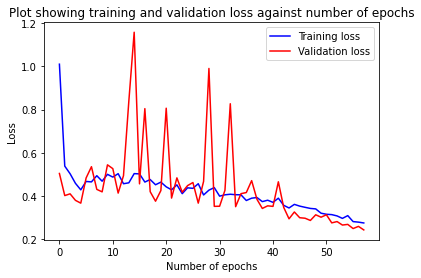

In [8]:
import matplotlib.pyplot as plt
x = range(len(df_r))
plt.title("Plot showing training and validation loss against number of epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(x, df_r.train, color='b', label='Training loss')
plt.plot(x, df_r.val, color='r', label='Validation loss')
plt.legend()
plt.savefig('results/T3_loss_curves.png', bbox_inches='tight')
plt.show()